# TripFare : Predicting Urban Taxi Fare with Machine Learning

In [1]:
# import necessary packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

from datetime import datetime
from math import radians, cos, sin, asin, sqrt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.feature_selection import SelectKBest, f_regression, chi2
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split, GridSearchCV

In [2]:
# load the dataset

df = pd.read_csv("taxi_fare.csv") # provide file url to read data

In [3]:
# display the first 5 rows

df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,1,2016-03-01 00:00:00,2016-03-01 00:07:55,1,-73.976746,40.765152,1,N,-74.004265,40.746128,1,9.0,0.5,0.5,2.05,0.00,0.3,12.35
1,1,2016-03-01 00:00:00,2016-03-01 00:11:06,1,-73.983482,40.767925,1,N,-74.005943,40.733166,1,11.0,0.5,0.5,3.05,0.00,0.3,15.35
2,2,2016-03-01 00:00:00,2016-03-01 00:31:06,2,-73.782021,40.644810,1,N,-73.974541,40.675770,1,54.5,0.5,0.5,8.00,0.00,0.3,63.80
3,2,2016-03-01 00:00:00,2016-03-01 00:00:00,3,-73.863419,40.769814,1,N,-73.969650,40.757767,1,31.5,0.0,0.5,3.78,5.54,0.3,41.62
4,2,2016-03-01 00:00:00,2016-03-01 00:00:00,5,-73.971741,40.792183,3,N,-74.177170,40.695053,1,98.0,0.0,0.0,0.00,15.50,0.3,113.80


In [4]:
# display column names

df.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude', 'RatecodeID',
       'store_and_fwd_flag', 'dropoff_longitude', 'dropoff_latitude',
       'payment_type', 'fare_amount', 'extra', 'mta_tax', 'tip_amount',
       'tolls_amount', 'improvement_surcharge', 'total_amount'],
      dtype='object')

In [5]:
# checking datatype of each column

df.dtypes

VendorID                   int64
tpep_pickup_datetime      object
tpep_dropoff_datetime     object
passenger_count            int64
pickup_longitude         float64
pickup_latitude          float64
RatecodeID                 int64
store_and_fwd_flag        object
dropoff_longitude        float64
dropoff_latitude         float64
payment_type               int64
fare_amount              float64
extra                    float64
mta_tax                  float64
tip_amount               float64
tolls_amount             float64
improvement_surcharge    float64
total_amount             float64
dtype: object

In [6]:
# check missing values of each column

df.isnull().sum()

VendorID                 0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
pickup_longitude         0
pickup_latitude          0
RatecodeID               0
store_and_fwd_flag       0
dropoff_longitude        0
dropoff_latitude         0
payment_type             0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
dtype: int64

In [7]:
# check for duplicate rows

df.duplicated().sum()

0

In [8]:
# summary statistics of numerical columns

df.describe()

,VendorID,passenger_count,pickup_longitude,pickup_latitude,RatecodeID,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
count,212345.000000,212345.000000,212345.000000,212345.000000,212345.000000,212345.000000,212345.000000,212345.000000,212345.000000,212345.000000,212345.000000,212345.000000,212345.000000,212345.000000,212345.000000
mean,1.708338,1.766493,-73.112122,40.279405,1.034152,-73.144178,40.295648,1.324943,12.665588,0.048077,0.497662,1.809357,0.329049,0.299637,15.649355
std,0.454529,1.469647,7.936633,4.370714,0.494699,7.794599,4.293031,0.478255,10.875584,0.148103,0.037436,2.507419,2.028199,0.014094,13.592129
min,1.000000,0.000000,-121.933327,0.000000,1.000000,-121.933327,0.000000,1.000000,-52.000000,-0.500000,-0.500000,-2.700000,0.000000,-0.300000,-52.800000
25%,1.000000,1.000000,-73.990891,40.740292,1.000000,-73.990570,40.740089,1.000000,6.500000,0.000000,0.500000,0.000000,0.000000,0.300000,8.300000
50%,2.000000,1.000000,-73.979469,40.755989,1.000000,-73.978691,40.755508,1.000000,9.500000,0.000000,0.500000,1.350000,0.000000,0.300000,11.620000
75%,2.000000,2.000000,-73.963295,40.770283,1.000000,-73.964645,40.767475,2.000000,14.500000,0.000000,0.500000,2.360000,0.000000,0.300000,17.160000
max,2.000000,6.000000,0.000000,42.786934,99.000000,0.000000,42.786934,4.000000,819.500000,4.500000,0.500000,218.950000,661.080000,0.300000,832.800000


In [9]:
# find trip distance using haversine formula

def haversine(lat1,lon1,lat2,lon2):
    # convert decimal degrees to radians
    lat1, lon1, lat2, lon2 = map(radians, [lat1, lon1, lat2, lon2])

    # haversine formula
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a))
    r = 6371 # radius of earth in kilometers
    return c * r

df['trip_distance_km'] = df.apply(lambda row : haversine(row['pickup_latitude'], row['pickup_longitude'], row['dropoff_latitude'], row['dropoff_longitude']), axis = 1)

In [10]:
# convert to datetime with timezone (UTC)

df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'], errors='coerce')
df['tpep_dropoff_datetime'] = pd.to_datetime(df['tpep_dropoff_datetime'], errors='coerce')
df['tpep_pickup_datetime'] = df['tpep_pickup_datetime'].dt.tz_localize('UTC')
df['tpep_dropoff_datetime'] = df['tpep_dropoff_datetime'].dt.tz_localize('UTC')

In [11]:
# calculate trip duration in minutes

df['trip_duration_min'] = (df['tpep_dropoff_datetime'] - df['tpep_pickup_datetime']).dt.total_seconds() / 60

In [12]:
# convert UTC to eastern time (EDT)

df['pickup_datetime_edt'] = df['tpep_pickup_datetime'].dt.tz_convert('US/Eastern')

In [13]:
# extract pickup day (weekday/weekend)

df['pickup_day'] = df['pickup_datetime_edt'].dt.day_name()
df['is_weekend'] = df['pickup_datetime_edt'].dt.dayofweek >=5 #5 - saturday, 6 - sunday

In [14]:
# extract month

df['month'] = df['pickup_datetime_edt'].dt.month_name()

In [15]:
# extract am/pm

df['am_pm'] = df['pickup_datetime_edt'].dt.strftime('%p') # 'AM' or 'PM'

In [16]:
# Is night ride (11 PM to 5 AM)

df['hour'] = df['pickup_datetime_edt'].dt.hour
df['is_night'] = df['hour'].apply(lambda x : 1 if (x >= 23 or x < 5) else 0)

In [17]:
# rush hour indicator (7-10 AM and 4-7 PM weekdays)

df['is_rush_hour'] = df.apply(lambda  row: 1 if ((row['hour'] in range(7, 11) or row['hour'] in range(16, 20)) and not row['is_weekend']) else 0, axis = 1)

# Exploratory Data Analysis (EDA)

In [18]:
# Fare per km and per minute (avoid division by zero)

df['fare_per_km'] = df['fare_amount'] / df['trip_distance_km'].replace(0, pd.NA)
df['fare_per_min'] = df['fare_amount'] / df['trip_duration_min'].replace(0, pd.NA)

In [19]:
# copying the original dataframe

eda_df = df.copy()

In [20]:
# remove extreme outliers for cleaner visualization

eda_df = eda_df[(eda_df['fare_amount'] > 0) & (eda_df['fare_amount'] < 100)]
eda_df = eda_df[(eda_df['trip_distance_km'] > 0) & (eda_df['trip_distance_km'] < 50)]
eda_df = eda_df[(eda_df['trip_duration_min'] > 0) & (eda_df['trip_duration_min'] < 120)]

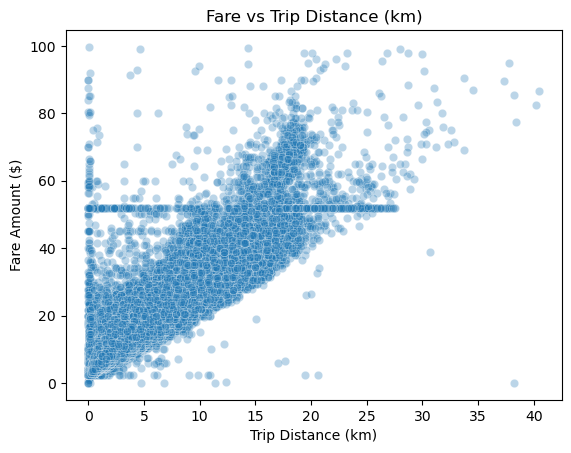

In [21]:
# Fare vs Distance

plt.figure(figure=(16,20))
sns.scatterplot(data=eda_df, x = 'trip_distance_km', y = 'fare_amount', alpha=0.3)
plt.title('Fare vs Trip Distance (km)')
plt.xlabel('Trip Distance (km)')
plt.ylabel('Fare Amount ($)')
plt.show()

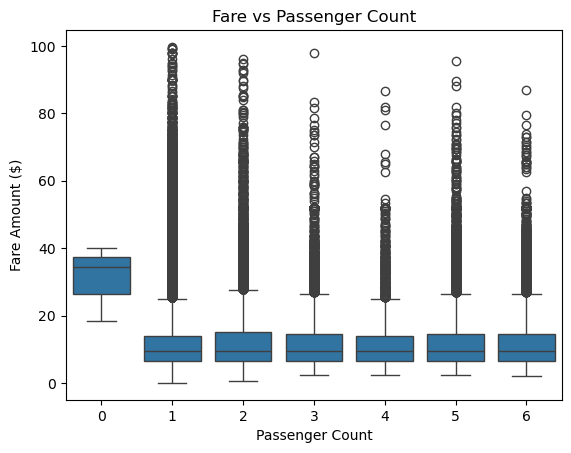

In [22]:
# Fare vs Passenger Count

sns.boxplot(data=eda_df, x='passenger_count', y='fare_amount')
plt.title('Fare vs Passenger Count')
plt.xlabel('Passenger Count')
plt.ylabel('Fare Amount ($)')
plt.show()

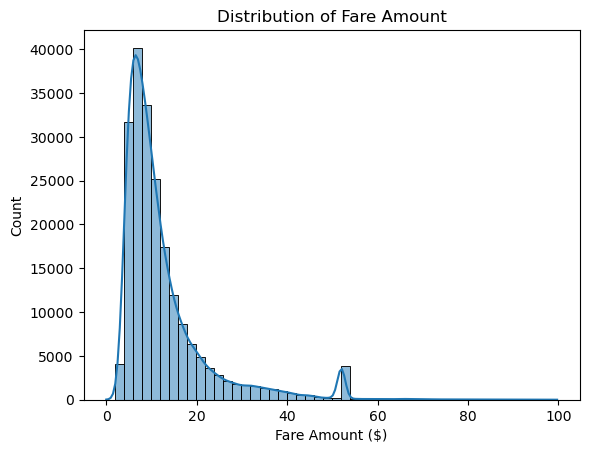

In [23]:
# Fare Distribution

sns.histplot(eda_df['fare_amount'], bins = 50, kde = True)
plt.title('Distribution of Fare Amount')
plt.xlabel('Fare Amount ($)')
plt.show()

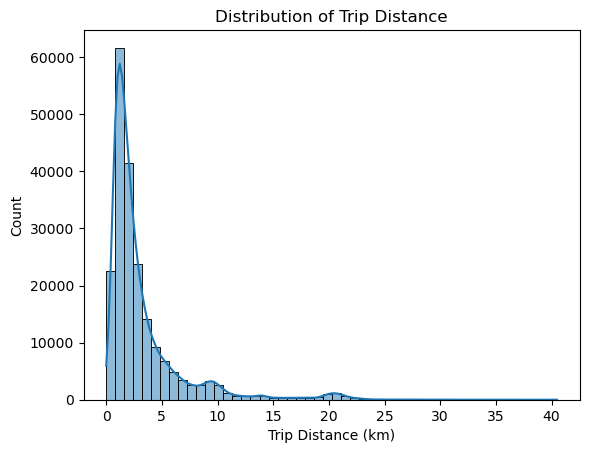

In [24]:
# Trip distance distribution

sns.histplot(eda_df['trip_distance_km'], bins = 50, kde = True)
plt.title('Distribution of Trip Distance')
plt.xlabel('Trip Distance (km)')
plt.show()

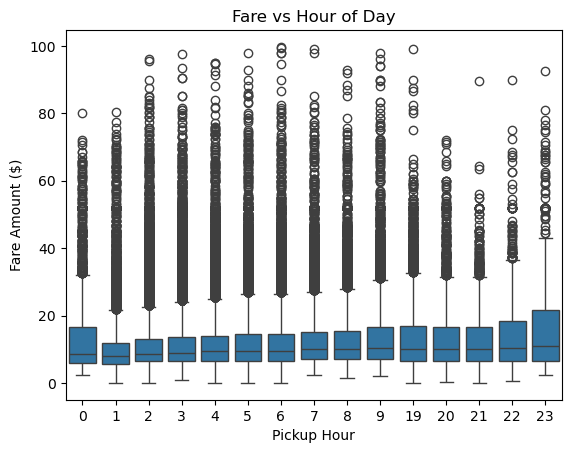

In [25]:
# Fare vs Hour of Day

sns.boxplot(data=eda_df, x = 'hour', y ='fare_amount')
plt.title('Fare vs Hour of Day')
plt.xlabel('Pickup Hour')
plt.ylabel('Fare Amount ($)')
plt.show()

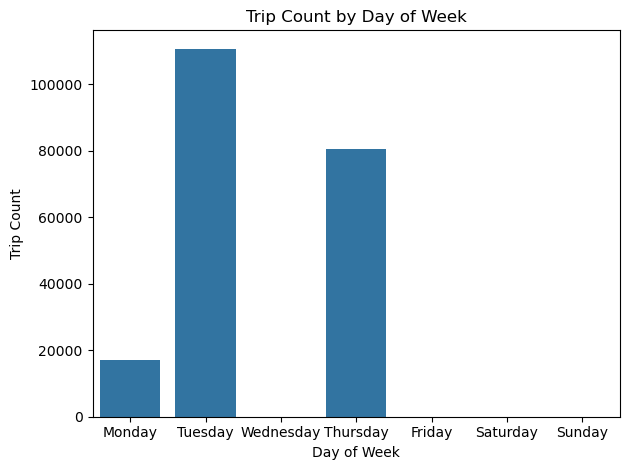

In [26]:
# Trip Counts by Pickup Day

sns.countplot(data=eda_df, x='pickup_day', order=[
              'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title('Trip Count by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Trip Count')

plt.tight_layout()
plt.show()

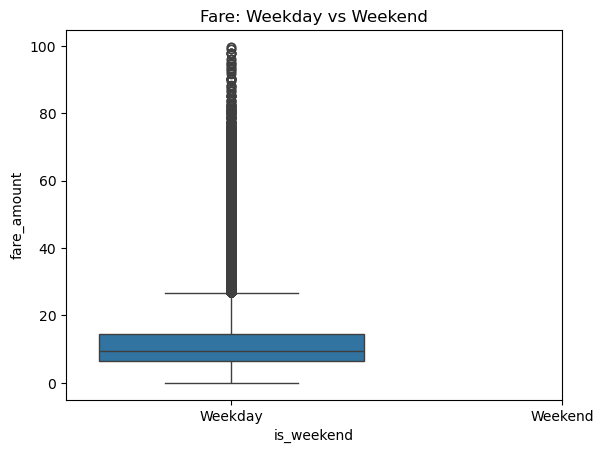

In [27]:
# Fare Variation: Weekday Vs Weekend

sns.boxplot(data = eda_df, x = 'is_weekend', y = 'fare_amount')
plt.xticks([0, 1], ['Weekday', 'Weekend'])
plt.title("Fare: Weekday vs Weekend")
plt.show()

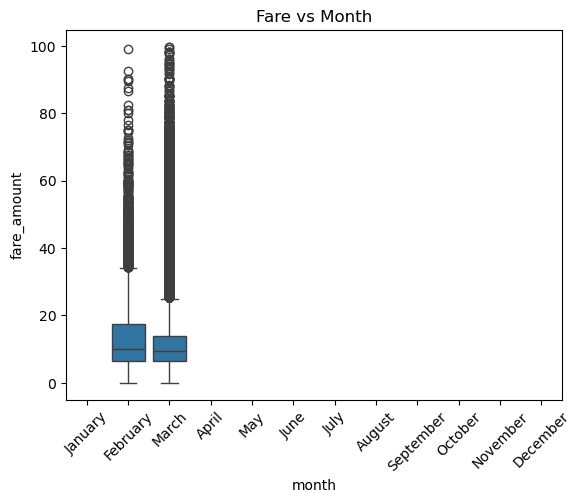

In [28]:
# Fare Variation: By Month

sns.boxplot(data=eda_df, x = 'month', y = 'fare_amount', order = ['January', 'February', 'March', 'April', 'May', 'June',
    'July', 'August', 'September', 'October', 'November', 'December'])
plt.xticks(rotation=45)
plt.title("Fare vs Month")
plt.show()

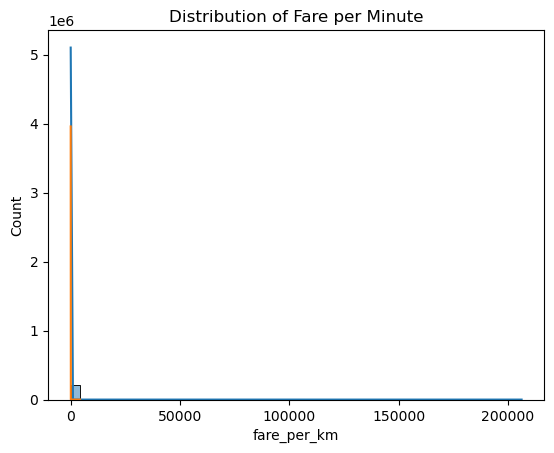

In [29]:
# Fare per km & minute

sns.histplot(eda_df['fare_per_km'].dropna(), bins=50, kde=True)
plt.title("Distribution of Fare per km")

sns.histplot(eda_df['fare_per_min'].dropna(), bins=50, kde=True)
plt.title("Distribution of Fare per Minute")
plt.show()

# Data Transformation

In [30]:
# IQR method for outlier handling

def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return df[(df[column] >= lower) & (df[column] <= upper)]

In [31]:
# Apply IQR filter to important columns

for col in ['fare_amount','trip_distance_km','trip_duration_min']:
    df = remove_outliers_iqr(df, col)

In [32]:
# Fix skewness in continuous variables (Log transformation for right skewed (positive) data)

# Add a small constant to avoid log(0)
df['log_fare_amount'] = np.log1p(df['fare_amount'])
df['log_trip_distance'] = np.log1p(df['trip_distance_km'])
df['log_trip_duration'] = np.log1p(df['trip_duration_min'])

C:\Users\admin\Downloads\AnacondaPackage\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [33]:
# To check skewness

df[['fare_amount','log_fare_amount']].skew()

fare_amount        0.799004
log_fare_amount   -0.026777
dtype: float64

# Encode Categorical Variables

In [34]:
# One hot-encode day and month

df = pd.get_dummies(df, columns=['pickup_day','month'], drop_first = True)

In [35]:
# Label Encoder

le = LabelEncoder()
eda_df['pickup_day_encoded'] = le.fit_transform(eda_df['pickup_day'])
eda_df['month_encoded'] = le.fit_transform(eda_df['month'])

# Feature Selection

In [36]:
# Feature correlation (numerical only)

correlation = df[['fare_amount','trip_distance_km','trip_duration_min','hour','is_weekend','is_night']].corr()

In [37]:
# Chi-Square Test (requires discrete non-negative input)

cat_features = eda_df[['pickup_day_encoded','month_encoded','is_weekend','is_night']]
chi_scores = chi2(cat_features, eda_df['fare_amount'].fillna(0).astype(int))

In [38]:
# Feature Importance using Random Forest

x = eda_df[['trip_distance_km','trip_duration_min','hour','is_weekend','is_night','pickup_day_encoded','month_encoded']]
y = eda_df['fare_amount']

model = RandomForestRegressor(n_estimators = 100, random_state = 42)
model.fit(x, y)
feature_importance = pd.Series(model.feature_importances_, index = x.columns).sort_values(ascending = False)

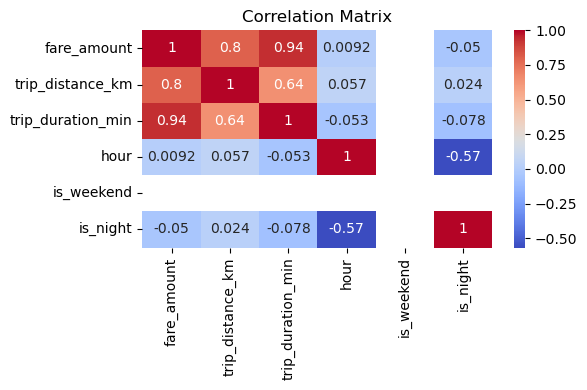

In [39]:
# Plot Correlation Heatmap

plt.figure(figsize=(6, 4))
sns.heatmap(correlation, annot = True, cmap = 'coolwarm')
plt.title("Correlation Matrix")
plt.tight_layout()
plt.show()

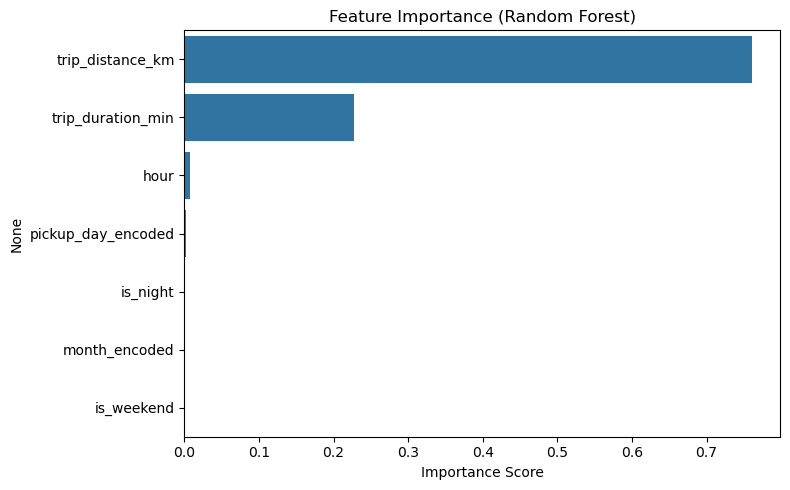

In [40]:
# Plot Feature Importance

plt.figure(figsize=(8, 5))
sns.barplot(x = feature_importance.values, y = feature_importance.index)
plt.title("Feature Importance (Random Forest)")
plt.xlabel("Importance Score")
plt.tight_layout()
plt.show()

In [41]:
# Chi-Square results table

chi_square_result = pd.DataFrame({
    "Feature" : cat_features.columns,
    "Chi2 Score" : chi_scores[0],
    "p-Value" : chi_scores[1]
}).sort_values(by = "Chi2 Score", ascending = False)

chi_square_result.head()

,Feature,Chi2 Score,p-Value
3,is_night,556.138665,8.363601e-65
0,pickup_day_encoded,351.206150,6.274276e-30
1,month_encoded,110.990442,1.929969e-01
2,is_weekend,NaN,NaN


# Model Building

In [42]:
# Prepare data

features = ['trip_distance_km','trip_duration_min','hour','is_weekend','is_night','pickup_day_encoded','month_encoded']
val = eda_df[features]
tar = eda_df['fare_amount']

In [43]:
# Train-test split

trdata, tsdata, trlab, tslab = train_test_split(val, tar, test_size = 0.2, random_state = 42)

In [44]:
# Feature Scaling

scaler = StandardScaler()
val_train_scaled = scaler.fit_transform(trdata)
val_test_scaled = scaler.transform(tsdata)

In [45]:
# Models

models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(alpha=1.0),
    "Lasso Regression": Lasso(alpha=0.1),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
}

In [46]:
# Evaluate each model

results = []

for name, model in models.items():
    if "Regression" in name:
        model.fit(val_train_scaled, trlab)
        test_pred = model.predict(val_test_scaled)
    else:
        model.fit(trdata,trlab)
        test_pred = model.predict(tsdata)

    r2 = r2_score(tslab,test_pred)
    mse = mean_squared_error(tslab,test_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(tslab,test_pred)

    results.append({
        "Model" : name,
        "R^2 Score" : round(r2, 4),
        "MSE" : round(mse, 4),
        "RMSE" : round(rmse, 4),
        "MAE" : round(mae, 4)
    })

In [47]:
# Convert to DataFrame for display

results_df = pd.DataFrame(results).sort_values(by="R^2 Score", ascending = False)
results_df

,Model,R^2 Score,MSE,RMSE,MAE
4,Gradient Boosting,0.9393,6.2185,2.4937,0.8640
3,Random Forest,0.9343,6.7326,2.5947,0.8709
0,Linear Regression,0.9193,8.2597,2.8740,1.1004
1,Ridge Regression,0.9193,8.2597,2.8740,1.1004
2,Lasso Regression,0.9190,8.2909,2.8794,1.1035


In [48]:
# 🔍 Hyperparameter Tuning using GridSearchCV for Random Forest

# Define base model
rf = RandomForestRegressor(random_state=42)

# Define parameter grid
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [10, 15, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Perform Grid Search
grid_search = GridSearchCV(estimator=rf,
                           param_grid=param_grid,
                           scoring='neg_root_mean_squared_error',
                           cv=5,
                           n_jobs=-1,
                           verbose=2)

# Fit on training data
grid_search.fit(val_train_scaled, trlab)

# Best model and parameters
best_rf_model = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)

# Evaluate the best model
rf_predictions = best_rf_model.predict(val_test_scaled)

print("R2 Score:", r2_score(tslab, rf_predictions))
print("RMSE:", np.sqrt(mean_squared_error(tslab, rf_predictions)))
print("MAE:", mean_absolute_error(tslab, rf_predictions))

Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best Parameters: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 150}
R2 Score: 0.9396037776395253
RMSE: 2.48692990791868
MAE: 0.8379582174104121


In [49]:
# Assume the best model is Gradient Boosting (from previous plan)

best_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)

# Fit on entire training data (scaled where needed)
best_model.fit(trdata, trlab)

# Save the model as pickle file
model_path = "best_taxi_model.pkl"

with open(model_path, "wb") as file:
    pickle.dump(best_model, file)

model_path

'best_taxi_model.pkl'